In [87]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import gc
from matplotlib import pyplot as plot
import seaborn as sb


In [100]:
%matplotlib inline

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data=pd.read_csv('az_res_real.csv')

In [5]:
data.columns

Index(['Title', 'Address', 'City', 'URL', 'Descr', 'Status', 'Price', 'Type',
       'Subtype', 'Spaces', 'SpaceAavail', 'Buidlsize', 'Caprate',
       'Buildclass', 'Lotsize', 'Rentrate', 'Buildyear', 'Parking', 'Occrate',
       'levles', 'Salestatus', 'Zoning', 'Listeddate', 'Investinfo', 'Transit',
       'Walk', 'Bike'],
      dtype='object')

In [6]:
data.columns=data.columns.str.lower()

In [7]:
data.columns

Index(['title', 'address', 'city', 'url', 'descr', 'status', 'price', 'type',
       'subtype', 'spaces', 'spaceaavail', 'buidlsize', 'caprate',
       'buildclass', 'lotsize', 'rentrate', 'buildyear', 'parking', 'occrate',
       'levles', 'salestatus', 'zoning', 'listeddate', 'investinfo', 'transit',
       'walk', 'bike'],
      dtype='object')

In [69]:
data=data.reset_index()

In [8]:
data.drop(['url','status','descr'], axis=1, inplace=True)

In [9]:
data.drop(['spaceaavail','buildclass','rentrate','parking','levles', 'salestatus', 'zoning','investinfo'], axis=1, inplace=True)

In [10]:
data.columns

Index(['title', 'address', 'city', 'price', 'type', 'subtype', 'spaces',
       'buidlsize', 'caprate', 'lotsize', 'buildyear', 'occrate', 'listeddate',
       'transit', 'walk', 'bike'],
      dtype='object')

In [14]:
np.sum(data.isnull())

title           0
address         0
city            0
price           1
type            0
subtype        32
spaces        432
buidlsize     213
caprate       380
lotsize       177
buildyear     241
occrate       467
listeddate      0
transit       237
walk           77
bike          228
dtype: int64

In [24]:
#clean price column to remove $ and comma and convert to float type
data['price']=data['price'].astype(str)
data['price']=data['price'].str.replace("$","")
data['price']=data['price'].str.replace(",","")
data['price']=data['price'].astype(float)
# fill na data with the average price in that city
data['price']=data['price'].fillna(500000)
data['price']

0       5800000.0
1      11400000.0
2      14500000.0
3       1100000.0
4       2300000.0
          ...    
495     1500000.0
496     1280000.0
497      520000.0
498       95000.0
499      140000.0
Name: price, Length: 500, dtype: float64

In [25]:
np.sum(data.isnull())

title           0
address         0
city            0
price           0
type            0
subtype        32
spaces        432
buidlsize     213
caprate       380
lotsize       177
buildyear     241
occrate       467
listeddate      0
transit       237
walk           77
bike          228
dtype: int64

In [26]:
# fill null values in 'subtype' from values of 'type'
data[data.subtype.isnull()]
data.loc[data['subtype'].isnull(),'subtype'] = data['type']
data[data.subtype.isnull()]

,title,address,city,price,type,subtype,spaces,buidlsize,caprate,lotsize,buildyear,occrate,listeddate,transit,walk,bike


In [27]:
np.sum(data.isnull())

title           0
address         0
city            0
price           0
type            0
subtype         0
spaces        432
buidlsize     213
caprate       380
lotsize       177
buildyear     241
occrate       467
listeddate      0
transit       237
walk           77
bike          228
dtype: int64

In [37]:
# calculate new column of number of days in the market
curr_time = pd.to_datetime("now")
data['days_market']=(curr_time - pd.to_datetime(data['listeddate']))/np.timedelta64(1,'D')
data['days_market']

0       53.90403
1      186.90403
2      130.90403
3       46.90403
4      121.90403
         ...    
495    907.90403
496    912.90403
497    912.90403
498    913.90403
499    913.90403
Name: days_market, Length: 500, dtype: float64

In [39]:
#clean caprate column by removing % sign and convert it to float
data['caprate']=data['caprate'].str.replace("%","")
data['caprate']=data['caprate'].astype(float)
data['caprate']

0      10.27
1       8.28
2       6.10
3        NaN
4       7.00
       ...  
495      NaN
496      NaN
497      NaN
498      NaN
499      NaN
Name: caprate, Length: 500, dtype: float64

In [46]:
#calculate new column to fix caprate null values
data['caprate2']=data['caprate']
data['caprate2']=data['caprate2'].fillna(np.random.randint(5.0,13.0))
data['caprate2'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [72]:
#fill in buildyear null values by randon values
data['buildyear2']=data['buildyear']
data['buildyear2']=data['buildyear2'].fillna(np.random.randint(1900,2020)).astype('int64')
data['buildyear2']

0      2019
1      1988
2      2019
3      1964
4      2003
5      1955
6      1945
7      1984
8      2000
9      1986
10     1978
11     1986
12     2007
13     2008
14     1952
15     2019
16     1992
17     2019
18     1979
19     2019
20     1960
21     2019
22     2019
23     2019
24     1982
25     2020
26     1985
27     2018
28     2019
29     1978
30     2019
31     2018
32     1983
33     2017
34     2019
35     2019
36     1965
37     2004
38     1947
39     2019
40     1972
41     1959
42     1921
43     1982
44     2020
45     1983
46     2019
47     2002
48     1984
49     1952
50     2019
51     1931
52     2019
53     2019
54     2019
55     2019
56     1925
57     2000
58     1947
59     2019
60     2008
61     1955
62     1955
63     2019
64     1975
65     2019
66     2019
67     1964
68     1971
69     2019
70     1966
71     2019
72     1981
73     2019
74     2019
75     2019
76     2018
77     2007
78     1958
79     2019
80     1988
81     2005
82     2019
83  

In [163]:
#check top cities that have majority of the properties for sale

data.groupby('city').size().reset_index(name='count').sort_values('count',ascending=False)

#data['city'].value_counts()

,city,count
56,Phoenix,108
77,Tucson,52
44,Mesa,35
65,Scottsdale,25
8,Casa Grande,23
26,Glendale,13
0,Apache Junction,12
4,Buckeye,12
21,Flagstaff,12
72,Surprise,11


In [90]:
# pick top cities that have number of properties on sale is more than 10
data2=data[data.groupby('city')['city'].transform('size') > 10]
#data_mt10.index
data2



,title,address,city,price,type,subtype,spaces,buidlsize,caprate,lotsize,buildyear,occrate,listeddate,transit,walk,bike,days_market,caprate2,buildyear2
0,Portfolio of 2 Properties - Portfolio of 2 Pro...,Portfolio of 2 Properties,Phoenix,5800000.0,Retail,Retail,NaN,"58,670 SF",10.27,"319,556 SF",NaN,NaN,12/4/19,NaN,Somewhat Walkable (58),NaN,53.90403,10.27,2019
1,8222 S 48th St - Residential Income Property,"8222 S 48th St, Phoenix, AZ",Phoenix,11400000.0,Office,Office,NaN,"109,481 SF",8.28,NaN,1988.0,NaN,7/24/19,NaN,NaN,Bikeable (50),186.90403,8.28,1988
2,Portfolio of 3 Properties - Portfolio of 3 Pro...,Portfolio of 3 Properties,Phoenix,14500000.0,Retail,Retail,NaN,"54,430 SF",6.10,"238,273 SF",NaN,NaN,9/18/19,NaN,Somewhat Walkable (66),Bikeable (62),130.90403,6.10,2019
3,303 W Flores St - Residential Income Property,"303 W Flores St, Tucson, AZ",Tucson,1100000.0,Multifamily,Apartments,28 Units,"11,507 SF",NaN,NaN,1964.0,96%,12/11/19,Some Transit (45),Very Walkable (71),Biker's Paradise (90),46.90403,8.00,1964
4,12133 W Bell Rd - Residential Income Property,"12133 W Bell Rd, Surprise, AZ",Surprise,2300000.0,Office,Office,NaN,"12,000 SF",7.00,NaN,2003.0,NaN,9/27/19,NaN,Car-Dependent (17),NaN,121.90403,7.00,2003
5,902 W Hazelwood St - Residential Income Property,"902 W Hazelwood St, Phoenix, AZ",Phoenix,325000.0,Specialty,Residential Income,NaN,"1,084 SF",7.00,NaN,1955.0,NaN,9/12/19,Good Transit (55),Very Walkable (70),Very Bikeable (77),136.90403,7.00,1955
6,6005 W Gardenia Ave - Residential Income Property,"6005 W Gardenia Ave, Glendale, AZ",Glendale,319000.0,Specialty,Residential Income,NaN,"1,092 SF",5.03,NaN,1945.0,NaN,6/4/19,Some Transit (42),Somewhat Walkable (58),Bikeable (63),236.90403,5.03,1945
7,5548 E Grant Rd - Residential Income Property,"5548 E Grant Rd, Tucson, AZ",Tucson,6941000.0,Retail,Health Club,NaN,"35,750 SF",6.50,"149,846 SF",1984.0,NaN,7/25/19,Some Transit (39),Car-Dependent (48),NaN,185.90403,6.50,1984
9,4585 E Speedway Blvd - Residential Income Prop...,"4585 E Speedway Blvd, Tucson, AZ",Tucson,3395000.0,Office,Office/Residential,NaN,"31,647 SF",NaN,NaN,1986.0,NaN,5/7/19,Some Transit (41),Very Walkable (72),NaN,264.90403,8.00,1986
10,7443 E Broadway Blvd - Residential Income Prop...,"7443 E Broadway Blvd, Tucson, AZ",Tucson,1047183.0,Retail,Auto Repair,NaN,"1,861 SF",5.75,"13,939 SF",1978.0,NaN,1/23/20,Some Transit (40),Very Walkable (74),Very Bikeable (80),3.90403,5.75,1978


In [92]:
#data2.describe(include='all')

In [ ]:
#data2[data2.caprate2[data2.caprate2 >8.0]]
#data_mt10[mask]

Text(0.5, 1.0, 'Hist of price')

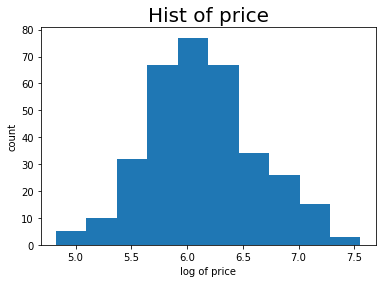

In [107]:
plot.hist(np.log10(data2['price']))
plot.xlabel('log of price')
plot.ylabel('count')
plot.title('Hist of price', fontsize =20)

Text(0, 0.5, 'Price $')

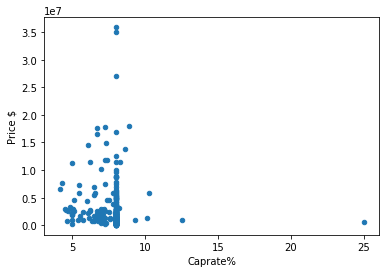

In [114]:
#plot.scatter(data2['price'],data2['caprate2'])
data2.plot(kind='scatter',x='caprate2',y='price')
plot.xlabel('Caprate%')
plot.ylabel('Price $')

In [115]:
scatter_df = data2[['caprate2', 'price']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

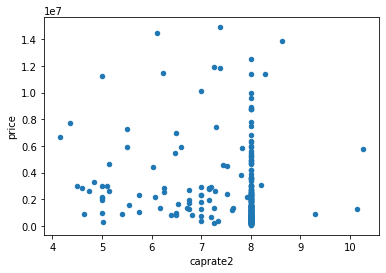

In [117]:
scatter_df.plot.scatter(x='caprate2', y='price')

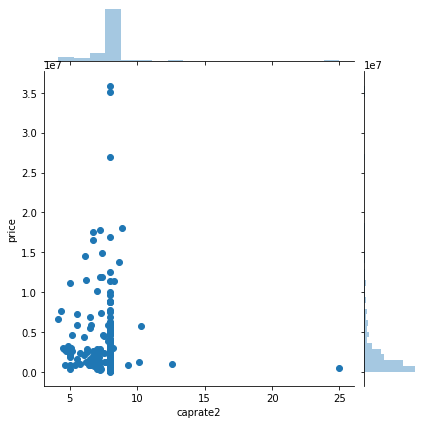

In [157]:
sb.jointplot(data2['caprate2'],data2['price'])

In [ ]:
plot.figure(figsize=(18,12))
data2.price.hist(by=data2.city, sharey=True)

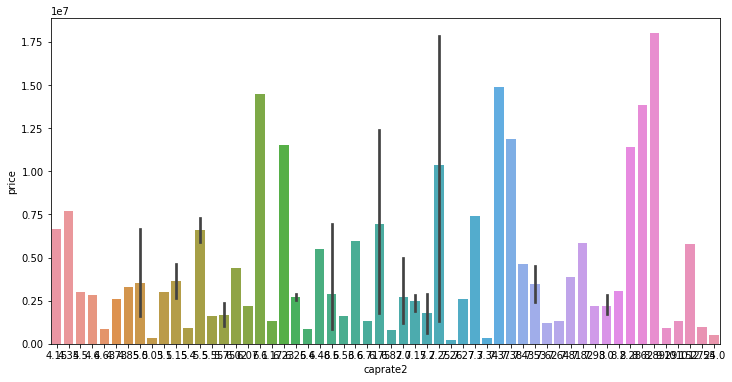

In [195]:
plot.figure(figsize=(12,6))
sb.barplot(x='caprate2',y='price',data=data2)

Text(0.5, 1.0, 'Number Of Properties For Sale')

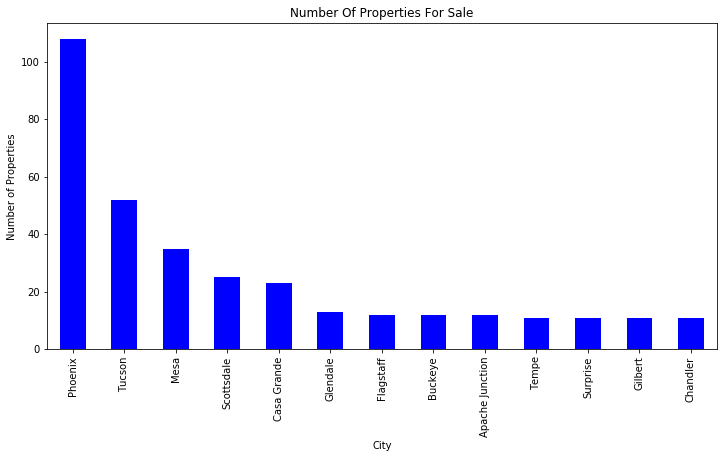

In [176]:
plot.figure(figsize=(12,6))
data2.groupby('city')['city'].count().sort_values(ascending=False).plot.bar(color='b')
plot.xlabel('City')
plot.ylabel('Number of Properties')
plot.title('Number Of Properties For Sale')

Text(0.5, 1.0, 'Type Of Properties For Sale')

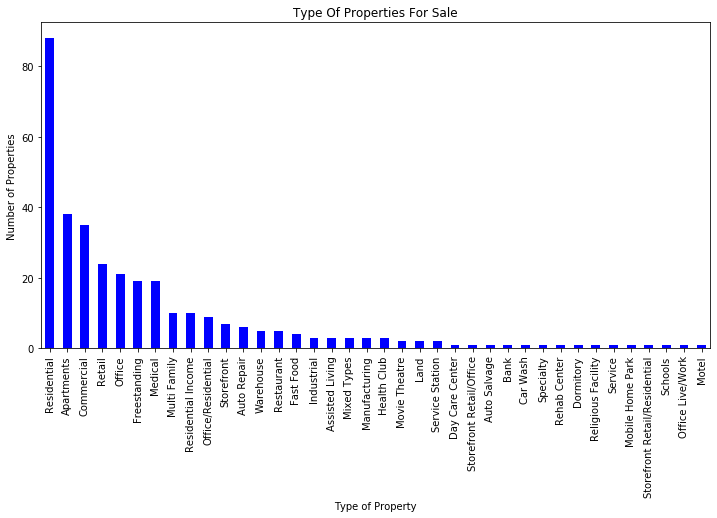

In [179]:
plot.figure(figsize=(12,6))
data2.groupby('subtype')['subtype'].count().sort_values(ascending=False).plot.bar(color='b')
plot.xlabel('Type of Property')
plot.ylabel('Number of Properties')
plot.title('Type Of Properties For Sale')

Text(0.5, 1.0, 'Median Price of Property By City')

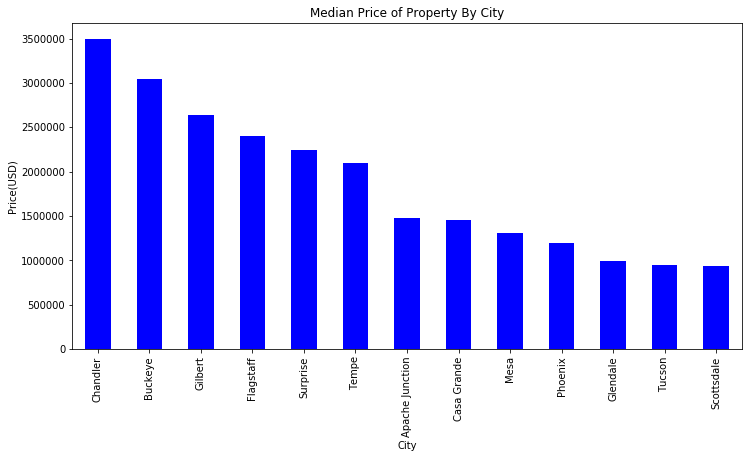

In [185]:
plot.figure(figsize=(12,6))

data2.groupby('city')['price'].median().sort_values(ascending=False).plot.bar(color='b')
plot.xlabel('City')
plot.ylabel('Price(USD)')
plot.title('Median Price of Property By City')

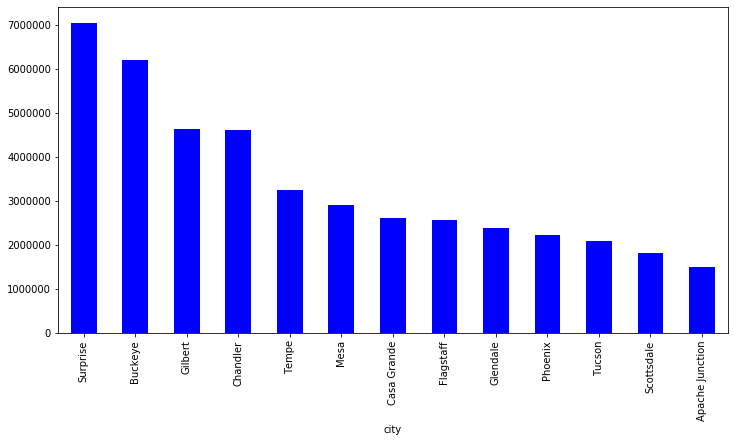

In [126]:
plot.figure(figsize=(12,6))

data2.groupby('city')['price'].mean().sort_values(ascending=False).plot.bar(color='b')

Text(0.5, 1.0, 'Median Price By Property Type')

<Figure size 864x864 with 0 Axes>

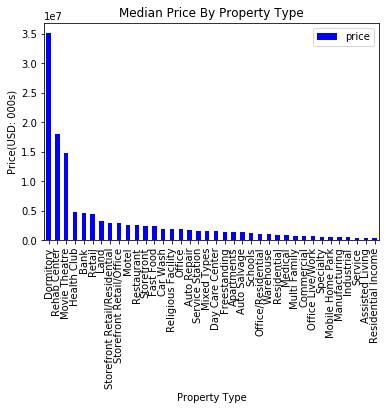

In [193]:
plot.figure(figsize=(12,12))
data2[['subtype','price']].groupby('subtype').median().sort_values('price',ascending=False).plot.bar(color='b')
plot.xlabel('Property Type')
plot.ylabel('Price(USD: 000s)')
plot.title('Median Price By Property Type')

<Figure size 864x432 with 0 Axes>

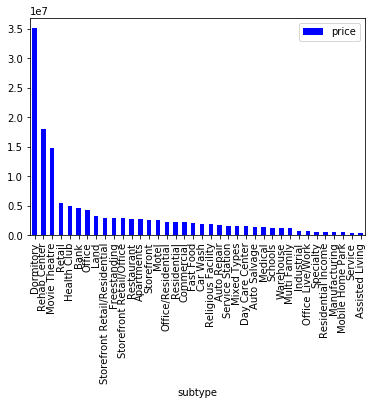

In [140]:
plot.figure(figsize=(12,6))
city_df[['subtype','price']].groupby('subtype').mean().sort_values('price',ascending=False).plot.bar(color='b')

In [139]:
city_df = data.groupby('city').filter(lambda x: x.shape[0] > 10)
city_df.shape
#country_df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar(color='b')

(336, 19)

In [174]:
data2[['city','price','subtype','caprate2','buildyear2','days_market']]

,city,price,subtype,caprate2,buildyear2,days_market
0,Phoenix,5800000.0,Retail,10.27,2019,53.90403
1,Phoenix,11400000.0,Office,8.28,1988,186.90403
2,Phoenix,14500000.0,Retail,6.10,2019,130.90403
3,Tucson,1100000.0,Apartments,8.00,1964,46.90403
4,Surprise,2300000.0,Office,7.00,2003,121.90403
5,Phoenix,325000.0,Residential Income,7.00,1955,136.90403
6,Glendale,319000.0,Residential Income,5.03,1945,236.90403
7,Tucson,6941000.0,Health Club,6.50,1984,185.90403
9,Tucson,3395000.0,Office/Residential,8.00,1986,264.90403
10,Tucson,1047183.0,Auto Repair,5.75,1978,3.90403


In [219]:
city_group=data2.groupby(['city']).agg({'price':np.median,'caprate2':np.mean,'buildyear2':np.median,'days_market':np.mean})

In [220]:
city_group

,price,caprate2,buildyear2,days_market
city,,,,
Apache Junction,1475000.0,7.618333,2013.0,313.987364
Buckeye,3045000.0,7.835000,2019.0,411.404030
Casa Grande,1450000.0,7.840435,2019.0,529.556204
Chandler,3500000.0,6.516364,2017.0,232.904030
Flagstaff,2400000.0,7.933333,2019.0,392.654030
Gilbert,2641000.0,7.198182,2019.0,206.904030
Glendale,995900.0,7.400000,2019.0,522.057876
Mesa,1311190.0,7.629714,1992.0,217.218316
Phoenix,1200000.0,7.778519,1997.5,235.089216


In [238]:
price_pearson=city_group.corr(method='pearson')
price_pearson['price'][1:].sort_values(ascending=False)

buildyear2     0.535681
caprate2      -0.181553
days_market   -0.184297
Name: price, dtype: float64

In [232]:
price_corr = city_group.corr(method='pearson')['price'].sort_values(ascending=False)

In [233]:
price_corr

price          1.000000
buildyear2     0.535681
caprate2      -0.181553
days_market   -0.184297
Name: price, dtype: float64

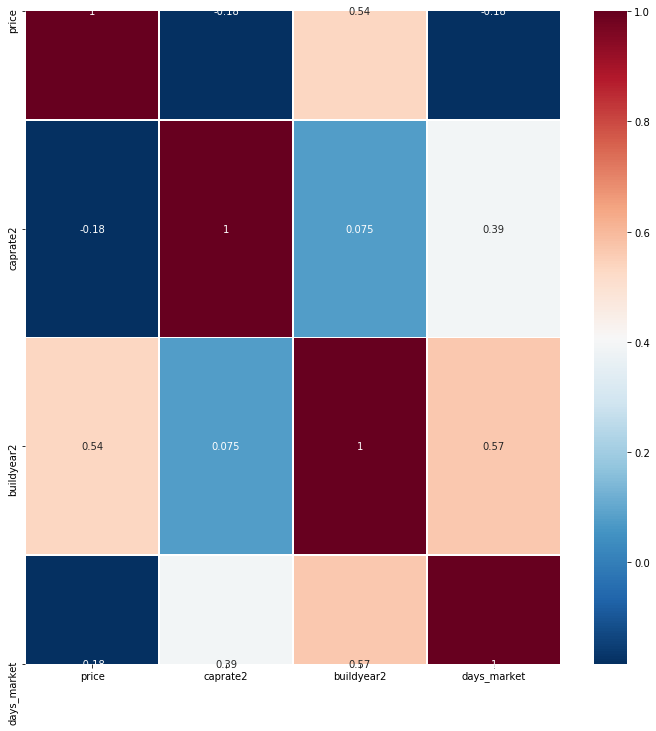

In [234]:
plot.figure(figsize=(12, 12))
sb.heatmap(price_pearson,
            xticklabels=price_pearson.columns,
            yticklabels=price_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [239]:
subtype_group=data2.groupby(['subtype']).agg({'price':np.median,'caprate2':np.mean,'buildyear2':np.median,'days_market':np.mean})

In [246]:
subtype_pearson=subtype_group.corr(method='pearson')
subtype_pearson['price'][1:].sort_values(ascending=False)

buildyear2     0.320842
caprate2       0.020641
days_market   -0.254855
Name: price, dtype: float64

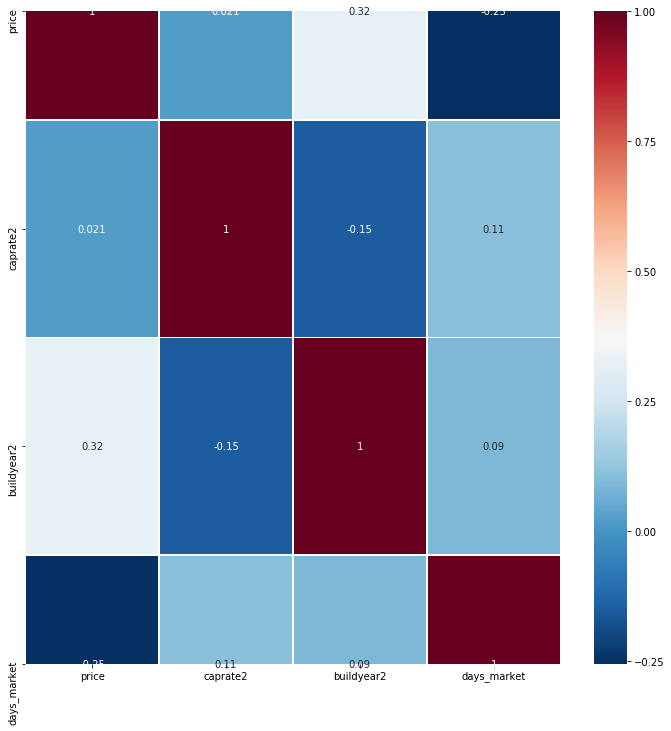

In [247]:
plot.figure(figsize=(12, 12))
sb.heatmap(subtype_pearson,
            xticklabels=subtype_pearson.columns,
            yticklabels=subtype_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)